<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/musica/musica_metrica_diversidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métrica **Diversidad de Usuario** en la Música

## Importar los datos
Es necesario agregar el archivo "kaggle.json" disponible en el repositorio al entorno de archivos del Colab:
- https://github.com/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/kaggle.json

El cual son los API de autorización de kaggle para poder descargar los dataset necesarios para la música.

In [2]:
# Crear el directorio .kaggle en Colab
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!pip install kaggle
!pip install tensorflow
!pip install fastFM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastFM: filename=fastFM-0.2.10-cp310-cp310-linux_x86_64.whl size=591781 sha256=91271b496463a8b4394801e04a26fe402c98ffa0d7e94222ce36e1ddede8a880
  Stored in directory: /root/.cache/pip/wheels/93/92/52/2da7997fcb7a7ce9042ff3b33836ef0c2fd47aa95382d7a113
Successfully built fastFM


In [4]:
# Descargar el dataset
!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("music-dataset-1950-to-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("music_dataset")

print("Path to dataset files: music_dataset")

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019
License(s): Attribution 4.0 International (CC BY 4.0)
 72% 7.00M/9.73M [00:00<00:00, 73.2MB/s]
100% 9.73M/9.73M [00:00<00:00, 64.7MB/s]
Path to dataset files: music_dataset


In [5]:
# Descargar el dataset de Last.fm
!kaggle datasets download -d harshal19t/lastfm-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("lastfm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("lastfm_dataset")

print("Path to dataset files: lastfm_dataset")

Dataset URL: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset
License(s): copyright-authors
  0% 0.00/3.93M [00:00<?, ?B/s]
100% 3.93M/3.93M [00:00<00:00, 146MB/s]
Path to dataset files: lastfm_dataset


## Procesamiento de Datasets Musicales
Considerar que se hace un join entre el `music_dataset` y `LastFM`, para obtener datos musicales que tienen metadata y datos de uso por diferentes usuarios.

In [6]:
import pandas as pd

music_data = pd.read_csv("music_dataset/tcc_ceds_music.csv")
lastfm = pd.read_csv("lastfm_dataset/Last.fm_data.csv")

Agregamos una columna `artist_song` para ambas tablas que es el nombre del artista más el nombre de la canción unida por un guíon. Así con esta tabla unimos la infromacion de cada usaurio y su canciones prefereidas con la infromación de esa canción.

In [7]:
#Crear la columna artist song que es el nombre del artista y el nombre de la cancion en minuscula
music_data['artist_song'] = music_data['artist_name'] + "-" + music_data['track_name']
music_data['artist_song'] = music_data['artist_song'].str.lower()

lastfm['artist_song'] = lastfm['Artist'] + "-" + lastfm['Track']
lastfm['artist_song'] = lastfm['artist_song'].str.lower()

Revisamos que no hay valores nulos en ninguna de las tablas originales para ver si se tuvo que haber hecho una limpieza antes. Pero vemos que lo unicos valores NaN son los albums que no importaran para los datos.

In [8]:
# Ver los valores Nan
print(music_data.isnull().sum())
print(lastfm.isnull().sum())

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
artist_song                 0
dtype: int64
Unnamed: 0      0
Username 

Luego hacemos el join o merge para juntar los metadatos de las decisiones de usuario.

In [9]:
# Realizar la unión de los datasets
usuario_music_data = pd.merge(music_data, lastfm, on='artist_song', how='inner')

# Verificar el resultado
print(f"Tamaño del dataset unido: {usuario_music_data.shape}")
usuario_music_data

Tamaño del dataset unido: (8105, 39)


,Unnamed: 0_x,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,topic,age,artist_song,Unnamed: 0_y,Username,Artist,Track,Album,Date,Time
0,250,the clovers,devil or angel,1956,pop,devil mind like devil dear whichever miss miss...,35,0.001698,0.350897,0.001698,...,violence,0.914286,the clovers-devil or angel,78154,franhale,The Clovers,Devil or Angel,The Clovers,23 Jan 2021,12:44
1,331,eddie cochran,completely sweet,1957,pop,completely sweet baby completely sweet mean ma...,73,0.166586,0.001096,0.001096,...,romantic,0.900000,eddie cochran-completely sweet,117435,eartle,Eddie Cochran,Completely Sweet,Singin' to My Baby,30 Jan 2021,13:03
2,705,the byrds,turn! turn! turn! (to everything there is a se...,1959,pop,turn turn turn season turn turn turn time purp...,95,0.000684,0.106944,0.000684,...,night/time,0.871429,the byrds-turn! turn! turn! (to everything the...,80881,franhale,The Byrds,Turn! Turn! Turn! (To Everything There Is a Se...,Turn! Turn! Turn!,31 Jan 2021,13:31
3,729,fats domino,blueberry hill,1959,pop,thrill blueberry blueberry moon stand blueberr...,24,0.003096,0.003096,0.003096,...,romantic,0.871429,fats domino-blueberry hill,16025,Babs_05,Fats Domino,Blueberry Hill,Fats Domino Swings,02 Jan 2021,00:14
4,735,the platters,smoke gets in your eyes,1959,pop,ask know true true course reply inside deny sa...,45,0.001316,0.001316,0.001316,...,sadness,0.871429,the platters-smoke gets in your eyes,16020,Babs_05,The Platters,Smoke Gets In Your Eyes,Remember When?,02 Jan 2021,00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,145081,massdosage,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8101,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,202988,Knapster01,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8102,82439,rakim,when i b on tha mic,2019,hip hop,internationally know hardcore real niggas inte...,58,0.001754,0.001754,0.001754,...,obscene,0.014286,rakim-when i b on tha mic,138926,massdosage,Rakim,When I B On Tha Mic,The Master,31 Jan 2021,19:54
8103,82446,the roots,the seed (2.0),2019,hip hop,knock months finna know want neosoul hiphop wa...,61,0.001224,0.001224,0.105172,...,obscene,0.014286,the roots-the seed (2.0),6390,Babs_05,The Roots,The Seed (2.0),Phrenology,31 Jan 2021,23:55


In [10]:
usuario_music_data.columns

Index(['Unnamed: 0_x', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age', 'artist_song', 'Unnamed: 0_y', 'Username', 'Artist',
       'Track', 'Album', 'Date', 'Time'],
      dtype='object')

In [11]:
# Instalar scikit-learn
!pip install scikit-learn

# Importar el módulo después de instalar
from sklearn.model_selection import train_test_split

# Dividir el dataset en una muestra representativa mínima
# Estratificaremos por 'Username' para garantizar que haya representación de usuarios
train, test = train_test_split(
    usuario_music_data,
    test_size=0.1,  # Reducir a un 10% el tamaño del dataset total
    stratify=usuario_music_data['Username'],
    random_state=42
)

# Verificar tamaños de los subconjuntos
print(f"Tamaño del conjunto de entrenamiento: {train.shape}")
print(f"Tamaño del conjunto de prueba: {test.shape}")

Tamaño del conjunto de entrenamiento: (7294, 39)
Tamaño del conjunto de prueba: (811, 39)


## Categorización de cada usuario
Obtenemos el top k=5 de categorias de cada usuario

In [12]:
# Calcular las K categorías más escuchadas por usuario en el conjunto reducido
k = 3
user_genre_df = train[['Username', 'genre']]

# Top K géneros más escuchados
top_k_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values(['Username', 'count'], ascending=[True, False])
    .groupby('Username')
    .head(k)
)

# Mostrar los resultados
print("Top K géneros más escuchados por usuario:")
print(top_k_categories)

Top K géneros más escuchados por usuario:
       Username   genre  count
4       Babs_05     pop    821
6       Babs_05    rock    525
0       Babs_05   blues     99
11   Knapster01     pop    619
13   Knapster01    rock    366
7    Knapster01   blues     74
18      Orlenay     pop    240
20      Orlenay    rock    111
14      Orlenay   blues     35
25       eartle     pop    453
27       eartle    rock    267
24       eartle    jazz     63
32     franhale     pop    822
34     franhale    rock    536
28     franhale   blues     95
40        isaac    rock     29
38        isaac     pop     13
37        isaac    jazz      4
43         jajo     pop     10
45         jajo    rock     10
44         jajo  reggae      2
50     jonocole     pop    370
52     jonocole    rock    232
49     jonocole    jazz     82
57  lobsterclaw    rock     10
55  lobsterclaw     pop      8
54  lobsterclaw    jazz      3
62   massdosage     pop    389
64   massdosage    rock    226
61   massdosage    jazz     

# Generar Recomendaciones

Se probará con diferentes métodos de recomendación para evaluar los resultados del modelo:


## Método Most Popular:
Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

### Procesamiento de Datos para Most Popular
Usar el metodo Most popular tomaremos las canciones descargadas/escuhadas por cada usuario como las canciones que quieren cada usaurio. Por lo que agregamos una columna llamada `Popularity` a la tabla de canciones que seria la cantidad de usaurios o veces que se descarga una cancion. Para luego recomendar canciones a cada usuario.


In [13]:
data_music = usuario_music_data[["Username", "artist_song", "genre"]]

In [14]:
# Poner numeros a username para indentificarlos a los artist_song un numero
dict_username = {}
dict_username_reverse = {}
for i, username in enumerate(data_music['Username'].unique()):
    dict_username[username] = i
    dict_username_reverse[i] = username

dict_artist_song = {}
dict_artist_song_reverse = {}
for i, artist_song in enumerate(data_music['artist_song'].unique()):
    dict_artist_song[artist_song] = i
    dict_artist_song_reverse[i] = artist_song

In [15]:
data_music['user_id'] = data_music['Username'].map(dict_username)
data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)
data_music.head()

<ipython-input-15-75271913f1ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['user_id'] = data_music['Username'].map(dict_username)
<ipython-input-15-75271913f1ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)


,Username,artist_song,genre,user_id,artist_song_id
0,franhale,the clovers-devil or angel,pop,0,0
1,eartle,eddie cochran-completely sweet,pop,1,1
2,franhale,the byrds-turn! turn! turn! (to everything the...,pop,0,2
3,Babs_05,fats domino-blueberry hill,pop,2,3
4,Babs_05,the platters-smoke gets in your eyes,pop,2,4


Ahora con todos los dataset dividos la data en `train` y `test`. Dejando por usuario una sección del 80% del usuario para el train y un 20% por usuario para el test.

In [16]:
from sklearn.model_selection import train_test_split

data_music_train = []
data_music_test = []

for user in data_music["user_id"].unique():
    user_data = data_music[data_music["user_id"] == user]
    train, test = train_test_split(user_data, test_size=0.2, random_state=42)
    data_music_train.append(train)
    data_music_test.append(test)


# Transformarlo a dataframe
data_music_train = pd.concat(data_music_train)
data_music_test = pd.concat(data_music_test)

In [17]:
data_music_test

,Username,artist_song,genre,user_id,artist_song_id
2604,franhale,peter bjorn and john-young folks,pop,0,973
5229,franhale,between the buried and me-melting city,jazz,0,1939
6266,franhale,faith no more-falling to pieces,rock,0,2360
1551,franhale,mariah carey-fantasy,pop,0,601
7952,franhale,i dont know how but they found me-do it all th...,rock,0,2984
...,...,...,...,...,...
3646,mremond,beach house-space song,pop,10,1283
6942,mremond,foo fighters-learn to fly,rock,10,2592
6745,mremond,depeche mode-home,rock,10,2534
1851,mremond,gillian welch-i'll fly away,pop,10,724


### Obtención de Top K Categorías

Creamos una funcion para obtener los top k de categorias por usuario.

In [18]:
def get_top_k_categories(df, k):
  user_genre_df = df[['Username', 'genre']]

  # Calcular las k categorías más escuchadas por cada usuario
  top_k_5_categories = (
      user_genre_df.groupby(['Username', 'genre'])
      .size()  # Contar ocurrencias de cada género por usuario
      .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
      .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
      .groupby('Username')  # Agrupar por usuario para obtener los top-k
      .head(k)  # Tomar los K géneros más escuchados por usuario
  )

  return top_k_5_categories

### Recomendación de Most Popular

Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

In [19]:
def recommend_most_popular(user, data_train, k=10):
  # Agrugar por canciones contando la cantidad de apariciones
  data_song_count = data_train.groupby('artist_song_id')['artist_song_id'].count().reset_index(name='popularity')
  # Colocar los nombres de las canciones
  data_song_count['artist_song'] = data_song_count['artist_song_id'].map(dict_artist_song_reverse)


  # Ordenar por popularity
  data_song_count = data_song_count.sort_values('popularity', ascending=False)
  top_k_popular_artist_song = data_song_count.head(k)

  top_k_popular_artist_song = top_k_popular_artist_song['artist_song'].tolist()

  return top_k_popular_artist_song



## Método Random
Recomienda canciones de manera aleatoria del conjunto de entrenamiento.
- Selecciona `k` canciones aleatorias
- Usado como baseline para comparaciones
- Debiese mostrar un aumento en la diversidad de las recomendaciones

In [20]:
import random

def recommend_random(user, data_train, k=10):
  # Obtener todas las canciones unicas
  unique_songs = data_train['artist_song'].unique()

  # Seleccionar k canciones aleatorias
  random_songs = random.sample(list(unique_songs), min(k, len(unique_songs)))

  return random_songs



## Método FastFM
FastFM es un modelo basado en Factorization Machines, utilizado para generar recomendaciones. Este enfoque:

- Aprende interacciones latentes entre usuarios y canciones a partir de datos dispersos.
- Es especialmente eficaz para integrar tanto características del usuario como del contenido, además de las interacciones implícitas.
- Emplea técnicas de factorización matricial y optimización eficiente para manejar grandes conjuntos de datos.

In [21]:
from fastFM import sgd
from scipy import sparse


def recommend_fastfm(user, data_train, k=10):
# COLUMNAS: Username,	artist_song, 	genre, 	user_id, 	artist_song_id
  # Creamos matriz de interacción
  us_matrix = pd.pivot_table(
    data_train,
    index='user_id',
    columns='artist_song',
    values='artist_song_id',
    aggfunc='count',
    fill_value=0
  )
  # Expandir matriz en formato largo
  interaction_data = us_matrix.stack().reset_index()
  interaction_data.columns = ['user_id', 'artist_song', 'interaction']
  interaction_data['interaction'] = (interaction_data['interaction'] > 0).astype(int)  # Binarización

  # Crear matriz dispersa para características
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)

  # Etiquetas (1 si hubo interacción, 0 si no)
  y = interaction_data['interaction'].values

  # Creamos el modelo de FastFM fit con primera columna de objetivo.
  ffm = sgd.FMRegression(n_iter=100, rank=2)
  ffm.fit(X, y)

  # Obtener vector del usuario para predicciones
  user_songs = us_matrix.loc[user]
  unseen_songs = user_songs[user_songs == 0].index  # Canciones no escuchadas
  user_data = pd.DataFrame({'user_id': [user] * len(unseen_songs), 'artist_song': unseen_songs})

  # Matriz dispersa para predicciones
  feature_columns = pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).columns
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)
  predicted_ratings = ffm.predict(X_user)

  # Ordenar y seleccionar las mejores recomendaciones
  user_data['predicted_rating'] = predicted_ratings
  top_recommendations = user_data.sort_values('predicted_rating', ascending=False).head(k)['artist_song'].tolist()

  return top_recommendations


## Método DeepFM
DeepFM es un modelo avanzado para sistemas de recomendación que combina lo mejor de las Factorization Machines (FMs) y las redes neuronales profundas (Deep Learning) para capturar interacciones complejas entre características. Este enfoque:

- Factorization Machines (FMs): Capturan de manera eficiente las interacciones de segundo orden entre características, como usuario y canción, especialmente en datos dispersos.
- Redes neuronales profundas: Aprenden interacciones de mayor nivel (no lineales) entre características, mejorando la capacidad del modelo para capturar patrones complejos.
- Integra ambos componentes en un solo modelo, compartiendo los mismos embeddings para reducir la redundancia y optimizar el aprendizaje.

In [22]:
from tensorflow import keras
import tensorflow as tf
import random

# Creamos el modelo de DeepFM
def build_deepfm(input_dim, k=10):
    # Input layer
    print("Input dim:", input_dim)
    input_song = keras.layers.Input(shape=(input_dim,))

    # FM Component
    fm_linear = keras.layers.Dense(1)(input_song)

    # Deep Component - Keep dimensions consistent
    deep = keras.layers.Dense(256, activation='relu')(input_song)
    deep = keras.layers.Dropout(0.2)(deep)
    deep = keras.layers.Dense(128, activation='relu')(deep)
    deep = keras.layers.Dense(64, activation='relu')(deep)
    # Final dense layer should output same shape as input for recommendations
    deep = keras.layers.Dense(input_dim)(deep)

    # Combine Components
    output = keras.layers.Add()([fm_linear, deep])

    # Model
    model = keras.Model(inputs=input_song, outputs=output)
    model.compile(optimizer='adam', loss='mse')
    return model

def recommend_deepfm(user, data_train, k=10):
    # Generate interaction matrix
    us_matrix = pd.pivot_table(
        data_train,
        values='genre',
        index='user_id',
        columns='artist_song',
        aggfunc='count',
        fill_value=0
    )

    print("Matrix shape:", us_matrix.shape)

    # Prepare data
    X = us_matrix.values
    input_dim = X.shape[1]
    # Use full matrix as target
    y = X

    # Train model
    model = build_deepfm(input_dim)
    history = model.fit(X, y, epochs=5, batch_size=32, verbose=1)

    # Generate predictions
    user_vector = us_matrix.loc[user].values.reshape(1, -1)
    predictions = model.predict(user_vector).flatten()

    # Create recommendations dictionary
    songs_dict = dict(zip(us_matrix.columns, predictions))

    # Filter unheard songs
    user_songs = set(data_train[data_train['user_id'] == user]['artist_song'])
    songs_dict = {song: score for song, score in songs_dict.items()
                 if song not in user_songs}

    # Sort and return top k
    sorted_songs = sorted(songs_dict.items(), key=lambda x: x[1], reverse=True)
    return [song for song, _ in sorted_songs[:k]]

## Método IKNN
 Recomienda canciones usando filtrado colaborativo basado en usuarios (IKNN - Item K-Nearest Neighbors).

 - Calcula la similitud entre usuarios basada en las canciones que han escuchado
 - Usa `similitud coseno` para encontrar los k usuarios más similares
 - Recomienda canciones que los usuarios similares han escuchado pero el usuario actual no

In [23]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

class MusicIKNN:
    def __init__(self, k=20):
        self.k = k
        self.item_similarity = None
        self.item_ids = None
        self.user_ids = None

    def _create_user_item_matrix(self, df):
        """
        Crea matriz usuario-item a partir del dataframe
        """
        # Crear mapeos de IDs únicos
        unique_users = df['user_id'].unique()
        unique_items = df['artist_song'].unique()
        self.user_ids = {user: idx for idx, user in enumerate(unique_users)}
        self.item_ids = {item: idx for idx, item in enumerate(unique_items)}

        # Crear matriz de interacciones
        rows = []
        cols = []
        data = []

        for _, row in df.iterrows():
            user_idx = self.user_ids[row['user_id']]
            item_idx = self.item_ids[row['artist_song']]
            rows.append(user_idx)
            cols.append(item_idx)
            data.append(1)  # 1 para indicar interacción

        return csr_matrix((data, (rows, cols)),
                         shape=(len(unique_users), len(unique_items)))

    def fit(self, df):
        """
        Entrena el modelo con el dataframe de interacciones
        """
        # Crear matriz usuario-item
        self.user_item_matrix = self._create_user_item_matrix(df)

        # Calcular similitud entre items
        self.item_similarity = cosine_similarity(self.user_item_matrix.T)
        # Evitar que la similitud consigo mismo sea 1
        np.fill_diagonal(self.item_similarity, 0)

        return self

    def recommend(self, username, df, n_recommendations=10):
        """
        Genera recomendaciones para un usuario
        """
        if username not in self.user_ids:
            print(f"Usuario {username} no encontrado en el dataset")
            return []

        # Obtener índice del usuario
        user_idx = self.user_ids[username]

        # Obtener vector de interacciones del usuario
        user_vector = self.user_item_matrix[user_idx].toarray().flatten()

        # Calcular predicciones
        predictions = self._predict(user_vector)

        # Poner -inf en items ya escuchados
        predictions[user_vector > 0] = float('-inf')

        # Obtener top N recomendaciones
        top_idx = np.argsort(predictions)[::-1][:n_recommendations]

        # Convertir índices a nombres de canciones
        reverse_item_ids = {v: k for k, v in self.item_ids.items()}
        recommendations = [reverse_item_ids[idx] for idx in top_idx]

        return recommendations

    def _predict(self, user_vector):
        """
        Genera predicciones para un vector de usuario
        """
        # Calcular predicciones usando similitud de items
        predictions = np.dot(self.item_similarity, user_vector)

        # Normalizar predicciones
        sim_sums = np.sum(np.abs(self.item_similarity), axis=0)
        sim_sums[sim_sums == 0] = 1  # Evitar división por cero
        predictions = predictions / sim_sums

        return predictions

## Método Híbrido
Método híbrido que combina popularidad con similtud de géneros según parámetro `alpha`.

Basado parcialmente en el [Siguiente Articulo](https://marketsy.ai/blog/hybrid-recommender-systems-beginners-guide).

- `alpha`: Parámetro para balancear entre popularidad global (`1-alpha`) y preferencias de género del usuario (`alpha`)
- Balance entre descubrimiento y relevancia de la recomendación



In [24]:
def recommend_hybrid(user, data_train, k=10, alpha=0.5):
  # Calcular los scores de popularidad de canciones
  popularity_scores = data_train.groupby('artist_song_id')['user_id'].count().to_dict()
  max_popularity = max(popularity_scores.values())
  min_popularity = min(popularity_scores.values())
  normalized_popularity = {song: count/max_popularity for song, count in popularity_scores.items()}

  # Obtener los generos preferidos del usuario
  user_songs = data_train[data_train['user_id'] == user]
  user_genres = user_songs['genre'].value_counts().to_dict()
  total_user_songs = sum(user_genres.values())
  prefered_user_genres = {genre: count/total_user_songs for genre, count in user_genres.items()}

  # Calcular el score combinado hibrido
  hybrid_scores = {}
  for song in data_train['artist_song'].unique():
    # Score de popularidad
    song_popularity = normalized_popularity.get(song, 0)

    # Score de genero
    song_genres = data_train[data_train['artist_song'] == song]['genre'].iloc[0]
    genre_score = prefered_user_genres.get(song_genres, 0)

    # Combinar Scores de popularidad y genero
    hybrid_scores[song] = (1-alpha) * song_popularity + (alpha) * genre_score

  # Filtrar las canciones ya escuchadas
  user_listened = set(user_songs['artist_song_id'])
  hybrid_scores = {song: score for song, score in hybrid_scores.items()
                    if song not in user_listened}

  # Retornar las top k canciones recomendadas
  top_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
  return [song for song, _ in top_recommendations[:k]]

# Calculamos Métricas:


## Metricas de Precisión
- MAP
- NDCG@5
- Precision@10
- Recall@10

In [25]:
def calculate_map(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Inicializar variables
  precision_sum = 0
  relevant_count = 0

  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      relevant_count += 1
      precision_sum += relevant_count / i

  if relevant_count > 0:
    map_value = precision_sum / relevant_count
  else:
    map_value = 0

  return map_value


In [26]:
import math

def calculate_ndcg(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Calcular DCG e IDCG
  dcg = 0
  idcg = 0
  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      dcg += 1 / math.log2(i + 1)
    idcg += 1 / math.log2(i + 1)

  # Calcular NDCG
  if idcg > 0:
    ndcg_value = dcg / idcg
  else:
    ndcg_value = 0

  return ndcg_value


In [27]:
def calculate_precision_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  precision_at_k = relevant_count / len(user_recommendation)

  return precision_at_k

In [28]:
def calculate_recall_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  recall_at_k = relevant_count / len(relevant_items)

  return recall_at_k


## Métricas de Diversidad: ¡Enfoque del Estudio!
- **User Diversity**: Métrica propuesta por la investigación
- Long Tail
- Shannon Entropy
- Intra List Diversity
- Diversity Coverage
- Inverse Propensity Score

### Definición de **USER DIVERSITY**, la métrica de la investigación.
1. `UD = 1 - (|∑{j=1...k}[(R_j/R)*log(R_j/R)]| / log(k))`
2. `k`: número de categorías para un usuario.
3. `R`: número total de recomendaciones.
4. `(R_j/R)`: Proporción de recomendaciones del usuario que pertenecen a la categoría `j`
5. `log(...)`: para penalizar concentración excesiva en una sola categoría.
6. `/ log(k)`: normaliza el valor.
7. `1 - `: Valor resultante entre 0 y 1.
8. *Valor alto*: alta diversidad en las recomendaciones recibidas por el usuario (pertenecen a varias categorías favoritas)

In [29]:
import math

def calculate_user_diversity(user_top_categories, user_recommendation, user_id, k=5):
    user = dict_username_reverse[user_id]
    # Obtener las top k categorías del usuario
    categories_user = user_top_categories[user_top_categories['Username'] == user]['genre'].tolist()[:k]

    # Filtrar recomendaciones para géneros relevantes
    filtered_recommendations = [
        rec for rec in user_recommendation
        if rec in music_data[music_data['genre'].isin(categories_user)]['artist_song'].tolist()
    ]

    # Total de recomendaciones relevantes
    r = len(filtered_recommendations)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Filtrar datos de música para las canciones recomendadas relevantes
    filtered_data = music_data[music_data['artist_song'].isin(filtered_recommendations)]

    # Calcular sum_diversity
    sum_diversity = 0
    for genre in categories_user:
        recommended_songs_genre = filtered_data[filtered_data['genre'] == genre]
        r_j = len(recommended_songs_genre)

        if r_j > 0:
            proportion = r_j / r
            contribution = proportion * math.log(proportion)
            sum_diversity += contribution

    # Normalizar con log(k)
    max_diversity = math.log(k) if k > 1 else 1.0
    # Ponemos en valor absoluto sum_diversity
    sum_diversity = abs(sum_diversity)

    if max_diversity == 0:
        return 0.0  # Si k <= 1, diversidad no tiene sentido

    # Calcular diversidad final
    diversity = 1 - (sum_diversity / max_diversity)

    # Depuración adicional
    return diversity


### **Long Tail**:
Mide que tan diversas son las recomendaciones en términos de popularidad de los items.
1.  Equación: `LT = |Intersection(Rec, TailItems)| / |Rec|`
2. Parametro `beta=0.4`: define umbral para considerar item como parte de la cola larga.
3. *Valor alto*: se recomiendan más items poco populares



In [30]:
def calculate_long_tail(test_data, user_recommendation, user_id, beta_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Procesamos las recomendaciones para obtener la popularidad de los items:
    item_popularity = test_data['artist_song'].value_counts().to_dict()

    # Ordenamos los items por popularidad
    sorted_items = sorted(item_popularity.items(), key=lambda x: x[1], reverse=True)
    n_items = len(sorted_items)
    tail_max = int(beta_value * n_items)

    # Identificamos los items en la LT
    long_tail = set(item for item, _ in sorted_items[tail_max:])

    # Calculamos la proporcion de items recomendades nen la cola larga
    longtail_recommendation = sum(1 for item in user_recommendation if item in long_tail)

    return longtail_recommendation / r


### **Entropía de Shannon**:
Mide la incertidumbre o aleatoriedad de la distribución de recomendaciones.
1. `H = -∑(pi*log2(pi)) / log2(n)`
2. `pi`: probabilidad de cada item en las recomendaciones
3. *Valor alto*: mayor aleatoriedad/diversidad en las recomendaciones.



In [31]:
def calculate_shannon_entropy(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener genero de las canciones recomendadas
    rec_genres = [
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    ]

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Contar la frecuencia de cada genero
    genre_counts = {genre: rec_genres.count(genre) for genre in set(rec_genres)}
    frecuencies = [count/r for count in genre_counts.values()]

    # Calcular la entropia
    entropy = -sum(p * math.log(p, 2) for p in frecuencies)

    # Normalizar con log(r)
    max_entropy = math.log(r) if r > 1 else 1.0
    entropy /= max_entropy

    return entropy

### **Intra List Diversity**:
Calcula diversidad basándose en la similitud entre los items.
1. `ILD = ∑∑(d(i,j)) / (n*(n-1)/2)`
2. `d(i,j)`: es la distancia entre los items `i` y `j`, usando coseno
3. *Valor alto*: mayor diversidad entre los items recomendados.



In [32]:
import numpy as np
def calculate_intra_list_diversity(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r < 2:
        return 0.0

    # Crear one-hot-encoding de caracteristicas basados en generos
    unique_genres = test_data['genre'].unique()
    one_genres = {genre: id_genre for id_genre, genre in enumerate(unique_genres)}

    # Creamos los vectores one_hot
    genre_vectors = []
    for song in user_recommendation:
        song_data = test_data[test_data['artist_song'] == song]
        if len(song_data) > 0:
            genre = song_data['genre'].iloc[0]
            one_hot = [1 if one_genres[genre] == i else 0 for i in range(len(unique_genres))]
            genre_vectors.append(one_hot)

    # Si no hay recomendaciones relevantes, devolver 0
    if len(genre_vectors) < 2:
        return 0.0

    # Calcular matriz de distancias usando distancia coseno
    feature_vectors = np.array(genre_vectors)
    distances = np.dot(feature_vectors, feature_vectors.T)

    # Calcular la diversidad intra-list, considerando la distancia coseno
    n = len(feature_vectors)
    comparisons = (n * (n - 1)) / 2
    intra_list_diversity = np.sum(distances) / (2 * comparisons)

    return intra_list_diversity


### **Diversity Coverage**:
Mide la cobertura como la proporción de items únicos recomendados respceto al total de items posibles.
1. `DC = |Unique_Rec| / |All Items|`
2. *Valor alto*: se están recomendando items de todo el catálogo



In [33]:
def calculate_diversity_coverage(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener generos unicos de las canciones recomendadas
    rec_genres = set(
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    )

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Obtener todos los posibles generos
    all_genres = set(test_data['genre'].unique())

    # Calcular la cobertura de la diversidad
    diversity_coverage = len(rec_genres) / len(all_genres)

    return diversity_coverage

### **Inverse Propensity Score** (IPS):
Penaliza la recomendación de items muy populares
1. `IPS = (1/p(i))`
2. Parametro `lambda` para suavizar la propensidad
3. `p(i)`: probabilidad que el item `i` sea seleccionado
4. *Valor alto*: se están recomendando más items poco probables.

In [34]:
def calculate_inverse_propensity_score(test_data, user_recommendation, user_id, lambda_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0

    # Calcular popularidad de las canciones
    song_popularity = test_data['artist_song'].value_counts().to_dict()
    interaction_count = sum(song_popularity.values())

    # Calcular Propensity Score
    prop_score = {
        song: ((song_popularity[song] + lambda_value) / (interaction_count + lambda_value))
        for song, count in song_popularity.items()
    }

    # Calcular IPS promedio
    ips = [1 / prop_score[song] for song in user_recommendation if song in prop_score]
    if len(ips) > 0:
        ips_avg = sum(ips) / len(ips)
        return ips_avg
    else:
        return 0.0

# Ejecución de Métodos

Creamos una función para ejecutar el modelo con parametros modificables correspondientes a:
- `test_data`: Datos para testeo del modelo
- `train_data`: Datos para entrenamiento del modelo
- `top_n`: Para recommendación *Modelo* (Most Popular, Random, Collaborative, Hibrido)
- `k`: Cuantos clusters de géneros se considerarán para los usuarios
- `beta_lt`: Parametro beta de métrica *Long Tail*, define umbral para considerar un item como parte de la *Long Tail*
- `lambda_ips`: Parámetro de métrica *Inverse Propensity Score*, sirve para suavizar el resultado.


## Método Most Popular

In [35]:
def most_popular_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_most_popular(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método Random

In [36]:
def random_metrcis(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_random(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método IKNN

In [37]:
def IKNN_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    model = MusicIKNN(k=20)
    model.fit(train_data)
    recommend_list = model.recommend(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método FastFM

In [38]:
def fastfm_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_fastfm(userid, train_data, k)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }

## Método Deep FM

In [39]:
def deepfm_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_deepfm(userid, train_data, k)

    user = dict_username_reverse[userid]
    print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }

## Método hibrido

In [40]:
def hybrid_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_hybrid(userid, train_data, top_n, alpha_hybrid)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


# Ejecución y obtención de métricas

Ahora con las funciones definidas para obtener las metricas las ejecutamos para obtener las metrcicas con 10 recomendaciones por modelo, 5 clusters por usuario, es decir 5 top generos por usuario. La beta para el long tail es de 40% mientras que para ips es de 50%.


### Most Popular Metrics

In [ ]:
metric_results = most_popular_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results['MAP']}")
print(f"nDCG: {metric_results['nDCG']}")
print(f"Precision: {metric_results['Precision']}")
print(f"Recall: {metric_results['Recall']}")
print(f"User_Diversity: {metric_results['User_Diversity']}")
print(f"Long_Tail: {metric_results['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results['Inverse_Propensity_Score']}")

MAP: 0.31029942279942285
nDCG: 0.23446691335535422
Precision: 0.23636363636363641
Recall: 0.010080959159261589
User_Diversity: 0.4262802266288572
Long_Tail: 0.0
Shannon_Entropy: 0.6576289144707822
Intra_List_Diversity: 0.40277777777777773
Diversity_Coverage: 0.4285714285714285
Inverse_Propensity_Score: 361.02719256052586


### Método Random

In [ ]:
metric_results_random = random_metrcis(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_random['MAP']}")
print(f"nDCG: {metric_results_random['nDCG']}")
print(f"Precision: {metric_results_random['Precision']}")
print(f"Recall: {metric_results_random['Recall']}")
print(f"User_Diversity: {metric_results_random['User_Diversity']}")
print(f"Long_Tail: {metric_results_random['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_random['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_random['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_random['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_random['Inverse_Propensity_Score']}")

MAP: 0.045454545454545456
nDCG: 0.017234248067191052
Precision: 0.018181818181818184
Recall: 0.008522727272727272
User_Diversity: 0.43073779375537313
Long_Tail: 0.2
Shannon_Entropy: 0.30840377217221443
Intra_List_Diversity: 0.5848484848484848
Diversity_Coverage: 0.2597402597402597
Inverse_Propensity_Score: 879.6712842712842


### Método FastFM

In [ ]:
metric_results_fastfm = fastfm_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_fastfm['MAP']}")
print(f"nDCG: {metric_results_fastfm['nDCG']}")
print(f"Precision: {metric_results_fastfm['Precision']}")
print(f"Recall: {metric_results_fastfm['Recall']}")
print(f"User_Diversity: {metric_results_fastfm['User_Diversity']}")
print(f"Long_Tail: {metric_results_fastfm['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_fastfm['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_fastfm['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_fastfm['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_fastfm['Inverse_Propensity_Score']}")

<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)
<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: All

MAP: 0.0606060606060606
nDCG: 0.0308327459339651
Precision: 0.03636363636363637
Recall: 0.0006007637586584954
User_Diversity: 0.5870512358424906
Long_Tail: 0.05454545454545456
Shannon_Entropy: 0.23971419163218932
Intra_List_Diversity: 0.18181818181818182
Diversity_Coverage: 0.11688311688311685
Inverse_Propensity_Score: 630.8848484848485


<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


### Método DeepFM

In [ ]:
metric_results_deepfm = deepfm_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_deepfm['MAP']}")
print(f"nDCG: {metric_results_deepfm['nDCG']}")
print(f"Precision: {metric_results_deepfm['Precision']}")
print(f"Recall: {metric_results_deepfm['Recall']}")
print(f"User_Diversity: {metric_results_deepfm['User_Diversity']}")
print(f"Long_Tail: {metric_results_deepfm['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_deepfm['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_deepfm['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_deepfm['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_deepfm['Inverse_Propensity_Score']}")

Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4985
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4440
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4586
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.6912
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6557
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
User: franhale - Recommended: ['damian marley-welcome to jamrock', 'my bloody valentine-off your face', 'nick drake-place to be', 'pat benatar-we live for love', 'don henley-how bad do you want it?']
Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2010
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4079
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5187
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5970
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
User: eartle - R

### Método IKNN

In [ ]:
metric_results_IKNN = IKNN_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_IKNN['MAP']}")
print(f"nDCG: {metric_results_IKNN['nDCG']}")
print(f"Precision: {metric_results_IKNN['Precision']}")
print(f"Recall: {metric_results_IKNN['Recall']}")
print(f"User_Diversity: {metric_results_IKNN['User_Diversity']}")
print(f"Long_Tail: {metric_results_IKNN['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_IKNN['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_IKNN['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_IKNN['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_IKNN['Inverse_Propensity_Score']}")

MAP: 0.14126984126984127
nDCG: 0.04818146792137012
Precision: 0.045454545454545456
Recall: 0.0020913248460744144
User_Diversity: 0.4333816137144146
Long_Tail: 0.11818181818181821
Shannon_Entropy: 0.21506569755732616
Intra_List_Diversity: 0.5303030303030304
Diversity_Coverage: 0.20779220779220775
Inverse_Propensity_Score: 906.8969696969697


### Método Hibrido

In [ ]:
metric_results_hybrid = hybrid_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_hybrid['MAP']}")
print(f"nDCG: {metric_results_hybrid['nDCG']}")
print(f"Precision: {metric_results_hybrid['Precision']}")
print(f"Recall: {metric_results_hybrid['Recall']}")
print(f"User_Diversity: {metric_results_hybrid['User_Diversity']}")
print(f"Long_Tail: {metric_results_hybrid['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_hybrid['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_hybrid['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_hybrid['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_hybrid['Inverse_Propensity_Score']}")

MAP: 0.13737373737373737
nDCG: 0.06856238557155644
Precision: 0.07272727272727274
Recall: 0.003261733099983584
User_Diversity: 0.9717347720834026
Long_Tail: 0.22727272727272727
Shannon_Entropy: 0.22946593944702387
Intra_List_Diversity: 1.1818181818181817
Diversity_Coverage: 0.1558441558441558
Inverse_Propensity_Score: 804.3781818181818


# Ejecución Global de Métodos

Definimos una función global para calcular todas las metricas para todos los modelos.

In [41]:
def global_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  model_iknn = MusicIKNN(k=20)
  model_iknn.fit(train_data)

  # Arreglo para almacenar los resultados de cada metodo
  records = []

  # Obtenemos las top k categorias
  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():
    # Genero recomendaciones para cada modelo
    recommendations = {
        'most_popular': recommend_most_popular(userid, train_data, top_n),
        'random': recommend_random(userid, train_data, top_n),
        'iknn': model_iknn.recommend(userid, train_data, top_n),
        'fastfm': recommend_fastfm(userid, train_data, top_n),
        'deepfm': recommend_deepfm(userid, train_data, top_n),
        'hybrid': recommend_hybrid(userid, train_data, top_n, alpha_hybrid),
    }

    # Calcular Metricas para cada modelo
    for model, recommend_list in recommendations.items():
      record = {
        'user_id': userid,
        'model': model,
          # Metricas de precision
        'MAP': calculate_map(test_data, recommend_list, userid),
        'nDCG': calculate_ndcg(test_data, recommend_list, userid),
        'Precision': calculate_precision_at_k(test_data, recommend_list, userid),
        'Recall': calculate_recall_at_k(test_data, recommend_list, userid),
          # Metricas de diversidad
        'User_Diversity': calculate_user_diversity(top_k_categories_data, recommend_list, userid),
        'Long_Tail': calculate_long_tail(test_data, recommend_list, userid, beta_lt),
        'Shannon_Entropy': calculate_shannon_entropy(test_data, recommend_list, userid),
        'Intra_List_Diversity': calculate_intra_list_diversity(test_data, recommend_list, userid),
        'Diversity_Coverage': calculate_diversity_coverage(test_data, recommend_list, userid),
        'Inverse_Propensity_Score': calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)
      }
      records.append(record)

  # Promedio de métricas
  results_df = pd.DataFrame(records)
  #print(results_df.head())

  return results_df


In [42]:
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
results_df.head()

<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4912
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.3343
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3286
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.3094
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4754
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2987
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3229
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3239
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3945
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4962
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2875
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3236
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3768
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5747
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.3411
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3195
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3452
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8864
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0248
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6484
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4481
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3809


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7194
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4735
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3676
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.2786
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.3216


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5587
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7442
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6049
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6099
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.5073
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.6794
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.7756
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5965
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3599
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3719
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4763
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7035
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0501
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5556
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4697
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3779
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7585
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9007
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4523
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2957
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3529
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,user_id,model,MAP,nDCG,Precision,Recall,User_Diversity,Long_Tail,Shannon_Entropy,Intra_List_Diversity,Diversity_Coverage,Inverse_Propensity_Score
0,0,most_popular,0.844444,0.752969,0.7,0.019553,0.344541,0.0,0.657629,0.402778,0.428571,361.027193
1,0,random,0.291667,0.179477,0.2,0.005587,0.581834,0.2,0.370576,0.833333,0.285714,820.995238
2,0,iknn,0.000000,0.000000,0.0,0.000000,0.118647,0.1,0.288539,1.000000,0.285714,867.466667
3,0,fastfm,0.000000,0.000000,0.0,0.000000,0.394624,0.1,0.144270,0.000000,0.142857,1084.333333
4,0,deepfm,0.305556,0.245731,0.3,0.008380,0.065022,0.2,0.547630,0.450000,0.428571,729.085079


## Analisis Global de Metricas
Analiza y visualiza los resultados de las métricas globales usando el Dataframe

### Generar visualizaciones comparativas entre los modelos
Creamos 3 tipos de gráficos para las visualizaciones:
1. Gráfico de cajas para cada métrica mostrando su distribución.
2. Heatmap de correlaciones entre métricas.
3. Gráfico de radar para comparar modelos.

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_global_metrics(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall' , 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']

  # Configurar el estilo usando seaborn
  sns.set_style

  # Crear el gráfico de cajas para cada metrica
  fig, axes = plt.subplots(3, 4, figsize=(20, 10))
  fig.suptitle('Distribución de Métricas por Modelo', fontsize=16)

  for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(x='model', y=metric, data=results_df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    ax.set_title(metric)
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)

  plt.tight_layout()
  plt.show()

  # Generar heatmap de correlaciones entre métricas
  correlation_matrix = results_df[metrics].corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
  plt.title('Correlación entre Métricas')
  plt.tight_layout()
  plt.show()

  # Grafico de radar para comparar modelos
    # Calcular promedios de las metricas normalizados
  avg_metrics = results_df.groupby('model')[metrics].mean()
  normalized_metrics = (avg_metrics - avg_metrics.min()) / (avg_metrics.max() - avg_metrics.min())

    # Configuramos grafico de radar: https://plotly.com/python/radar-chart/
  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
  angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
  angles = np.concatenate((angles, [angles[0]]))

    # Graficamos las metricas
  for model in normalized_metrics.index:
    values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

    # Configuramos etiquetas
  ax.set_xticks(angles[:-1], metrics)
  ax.set_ylim(0, 1)
  plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05))
  plt.title('Comparación de Métodos según Métricas Normalizadas')
  # plt.tight_layout()
  plt.show()

### Generar Análisis Estadístico de Significancia
Realiza un análisis estadístico de las diferencias entre modelos, incluyendo:
1. Media y desviación estándar por modelo.
2. Test ANOVA para evaluar la significancia estadística
3. Correlaciones entre las métricas


In [44]:
from scipy import stats

def analyze_significance(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
  # Calcular promedios de las metricas
  avg_metrics = results_df.groupby('model').mean()
  print("Promedios de Métricas por modelo:")
  print(avg_metrics.round(4))

  # Calcular desviaciones estandar
  std_metrics = results_df.groupby('model').std()
  print("Desviaciones estandar de Métricas por modelo:")
  print(std_metrics.round(4))

  # Calcular Test de ANOVA
  # Generamos grupos de comparacion segun modelos
  anova_results = {}
  for metric in metrics:
    groups = [group for _, group in results_df.groupby('model')[metric]]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[metric] = {'Estadistico-F': f_value, 'Valor-P': p_value}

  # Creo un dataframe con los resultados
  anova_df = pd.DataFrame(anova_results).T
  print("Resultados ANOVA:")
  print(anova_df.round(4))


## Generar Resultados Finales

In [49]:
def analyze_global_metrics(results_df):
  # Preparar e imprimir las visualizaciones usando nuestra funcion
  visualize_global_metrics(results_df)

  # Analisis estadistico usando nuestra funcion
  analyze_significance(results_df)

### Testeo de Parámetros para Ejecución Global
Queda ejecutado con parámetros:
- top_n = 10
- k = 5
- alpha_hybrid=0.5
- beta_lt=0.4
- lambda_ips=0.5


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.7385
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4917
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4733
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3257
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2789
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1104
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6530
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4542
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3377
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6652
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3682
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3527
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3648
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9597
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5011
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3298
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3087
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9540
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.5283
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.4125
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3251
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.3388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7410
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5877
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4759
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.6786
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5873
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4819
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4769
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7364
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6651
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4493
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4560
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3228
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3408
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6572
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6591
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5773
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3962
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4755
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3083
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3237
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1161
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3752
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5077
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5899
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-43-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-43-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-43-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-43-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-43-e13b0f

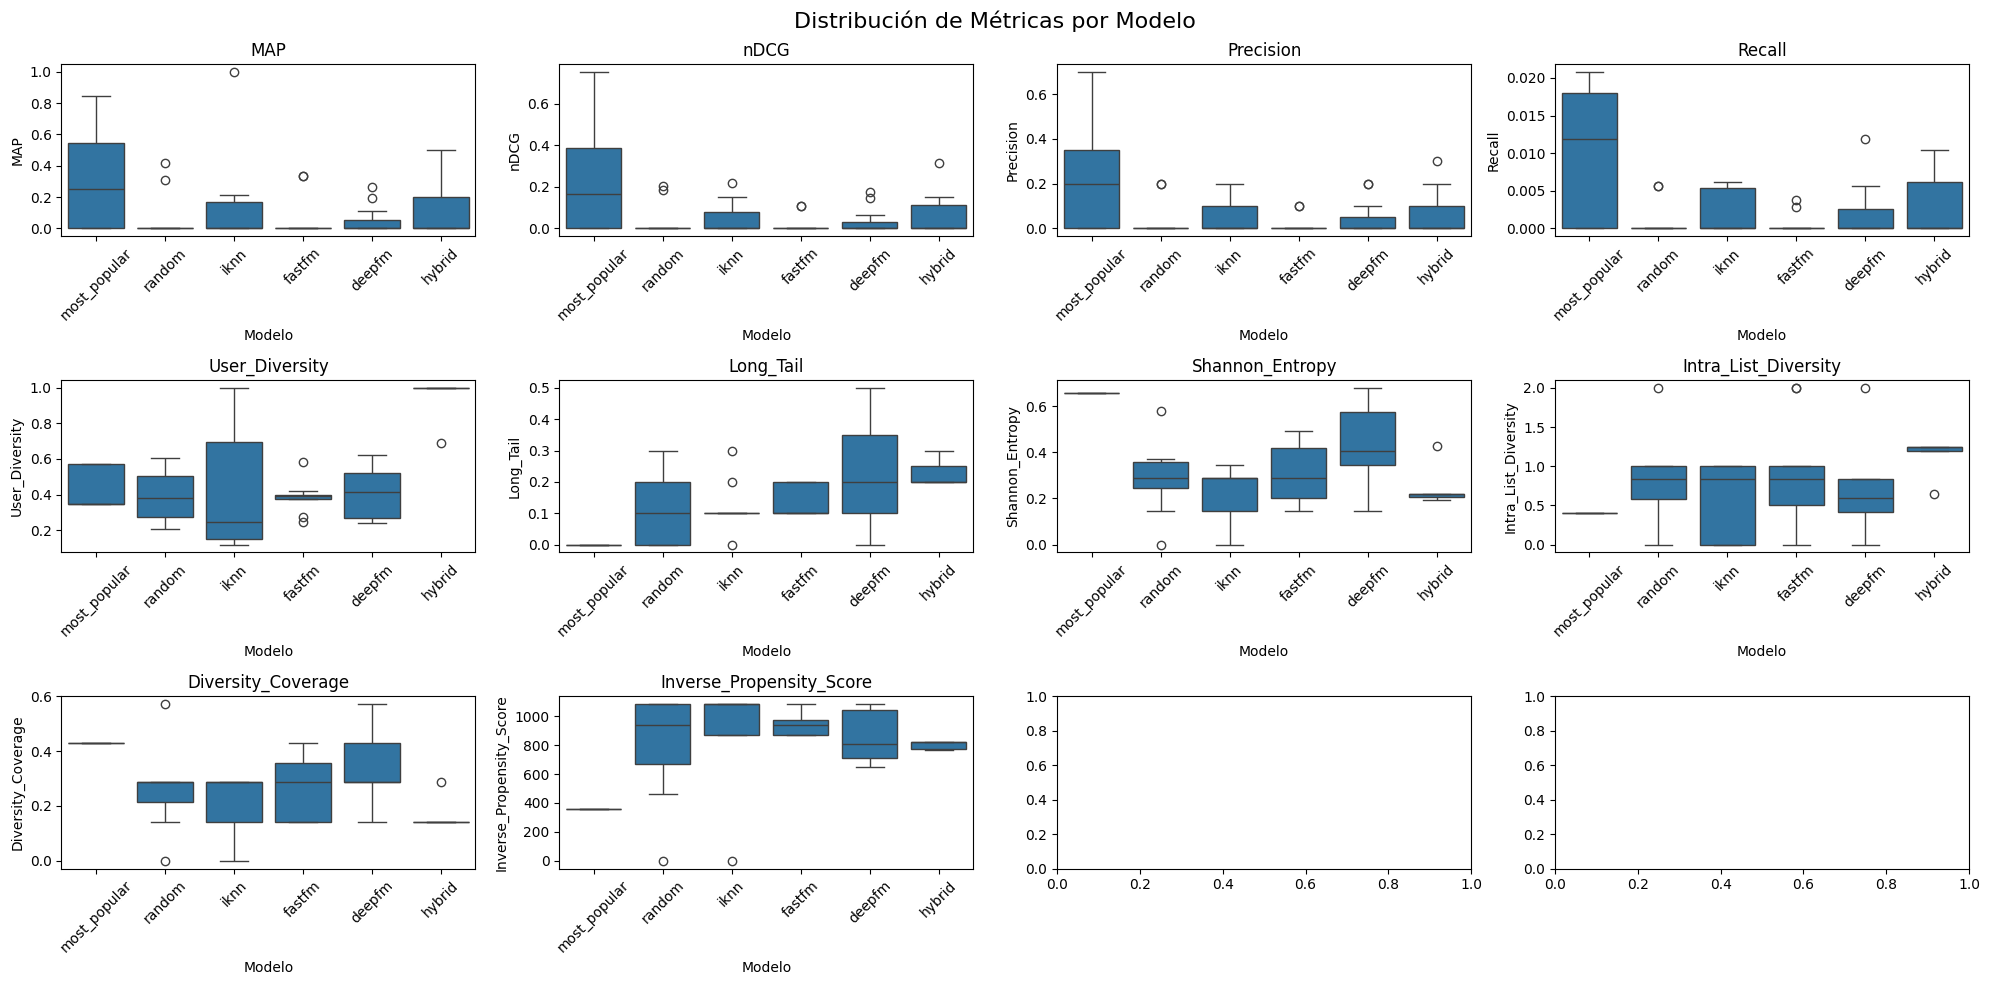

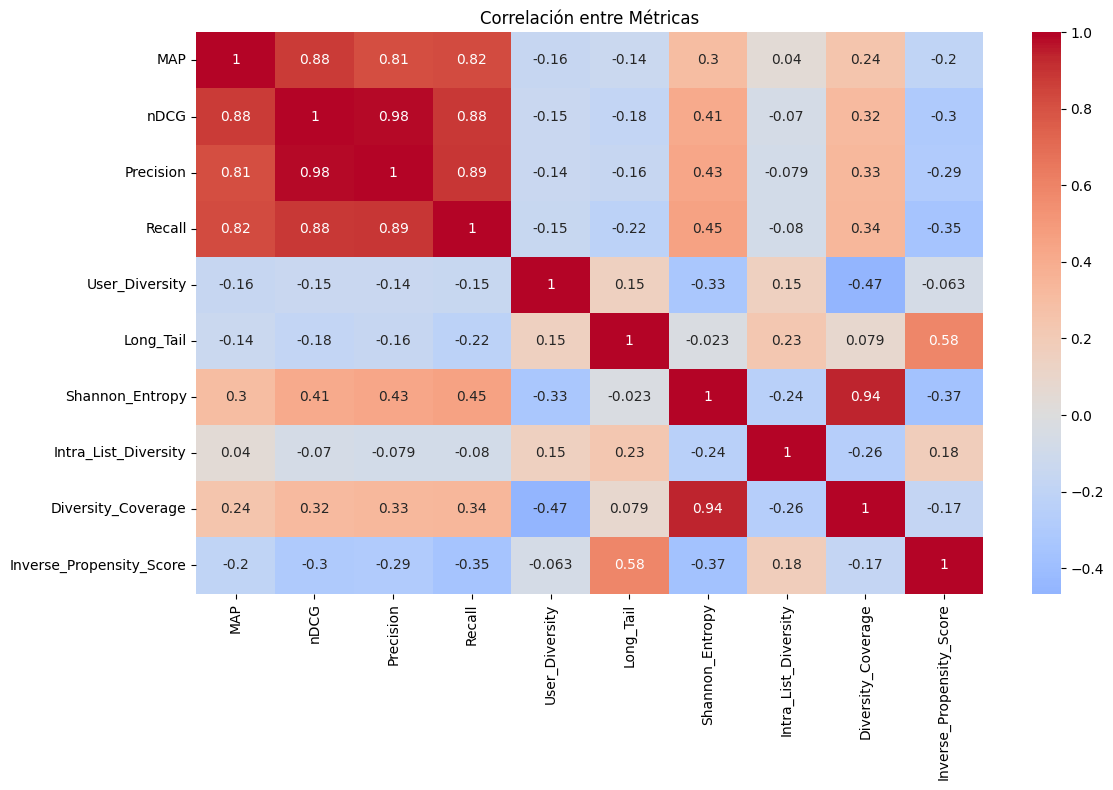

<ipython-input-43-e13b0fbe4920>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))


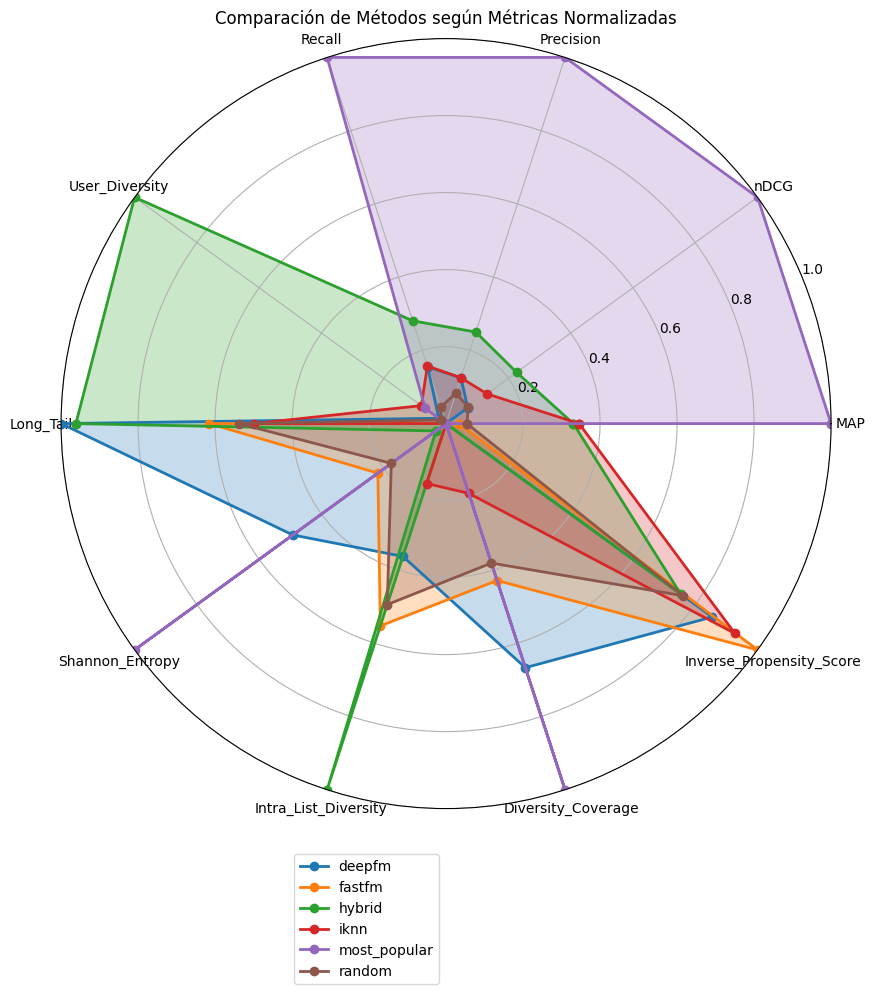

Promedios de Métricas por modelo:
              user_id     MAP    nDCG  Precision  Recall  User_Diversity  \
model                                                                      
deepfm            5.0  0.0520  0.0350     0.0455  0.0021          0.4008   
fastfm            5.0  0.0606  0.0200     0.0182  0.0006          0.3870   
hybrid            5.0  0.1374  0.0686     0.0727  0.0033          0.9717   
iknn              5.0  0.1413  0.0482     0.0455  0.0021          0.4334   
most_popular      5.0  0.3103  0.2345     0.2364  0.0101          0.4263   
random            5.0  0.0660  0.0353     0.0364  0.0010          0.3965   

              Long_Tail  Shannon_Entropy  Intra_List_Diversity  \
model                                                            
deepfm           0.2364           0.4329                0.6854   
fastfm           0.1455           0.3120                0.8333   
hybrid           0.2273           0.2295                1.1818   
iknn             0.1182    

In [50]:
# Obtener dataframe de resultados
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)

# Analisis estadistico usando nuestra funcion
analyze_global_metrics(results_df)

# Guardar dataframe de resultados
results_df.to_csv('global_metrics_results.csv', index=False)
print("DataFrame de resultados guardado en 'global_metrics_results.csv'")

Graficar ahora con distintos `top_n`para ver como se comportan las metricas de los distintos modelos.

In [ ]:
# Actualización de los modelos
models = ['most_popular', 'iknn', 'fastfm', 'deepfm', 'hybrid', 'random']
metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy',
           'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
top_n_list = [5, 10, 15, 20, 25]
k_category_list = [3, 5, 7]

# Crear datos simulados nuevamente para incluir los modelos actualizados
data = []
for model in models:
    for k in k_category_list:
        for top_n in top_n_list:
            values = np.random.rand(len(metrics))
            data.append([model, k, top_n] + list(values))

# Crear DataFrame actualizado
columns = ['model', 'k', 'top_n'] + metrics
df = pd.DataFrame(data, columns=columns)

# Crear figura con filas como k y columnas como métricas
fig, axes = plt.subplots(len(k_category_list), len(metrics), figsize=(40, 12), sharex=True, sharey=False)
fig.suptitle("Metrics across Top N values for different k", fontsize=16)

for i, k in enumerate(k_category_list):
    df_k = df[df['k'] == k]  # Filtrar por k

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        for model in models:
            df_model = df_k[df_k['model'] == model]
            ax.plot(df_model['top_n'], df_model[metric], label=model, marker='o')

        if i == 0:  # Títulos de las columnas (métricas)
            ax.set_title(metric)

        if j == 0:  # Etiquetas para cada fila (k)
            ax.set_ylabel(f"k={k}")

        ax.grid(True)
        if i == len(k_category_list) - 1:  # Etiqueta del eje X solo en la última fila
            ax.set_xlabel("Top N")

        if i == 0 and j == len(metrics) - 1:  # Solo una vez, agregar leyenda
            ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


In [47]:
# Cálculo de diversity_scores
diversity_scores = {}

# Lista de top_n a evaluar
top_n_list = [5, 10, 20]

# Obtener todos los modelos únicos
models = ['most_popular', 'iknn', 'deepfm', 'fastfm', 'hybrid', 'random']

for model in models:
    scores = []
    for top_n in top_n_list:
        # Recalcular resultados para este top_n específico
        results = global_metrics(data_music_test, data_music_train, top_n, k=5)
        score = results[results['model'] == model]['User_Diversity'].mean()
        scores.append(score)
    diversity_scores[model] = scores

<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6701
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8359
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5315
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4017
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6430
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.3416
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.3237
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.3647
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3586
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2241
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.4889
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.5316
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.5415
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5557
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7466
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4238
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3561
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6167
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4019
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2914
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3073
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.7120
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.3664
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 0.3327
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.3726
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.3578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1222
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4305
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5211
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5651
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3889
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3645
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3363
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3193
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6045
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4935
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4126
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2945
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1897
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6330
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4677
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3926
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.3079
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5488
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5069
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.5222
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.4512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4677
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3492
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2713
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2922
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6678
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5386
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3683
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2621
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5139
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3183
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3241
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3052
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2847
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6641
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.7718
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4665
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.4361
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4844
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8226
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4591
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5008
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4010
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3133
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2428
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5485
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3919
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4301
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0387
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4173
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5454
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5416
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4610
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4252
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3263
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2877
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3557
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3808
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6320
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3308
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2857
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.4141
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4211
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3119
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3538
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2972
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2730
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5003
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.8237
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4468
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3057
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.8509
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0340
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6107
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3857
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6318
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.3004
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3079
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3860
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5173
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2888
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3068
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3436
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3353
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6342
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4791
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3280
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2842
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8267
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.8375
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5341
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3380
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5256
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2809
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3220
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3533
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8911
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3760
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5263
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4813
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.3386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7621
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4275
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2887
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2972
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5350
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3431
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3105
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3000
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3151
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5589
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4192
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4021
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2962
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3176
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8437
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.3538
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.4544
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4178
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.3346
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8464
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3644
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3038
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3932
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5563
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4446
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3191
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3246
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3418
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4454
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5583
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6839
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4546
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.5225
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.5643
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.6634
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0471
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6515
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4495
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.7077
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5993
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3578
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3513
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3516
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4027
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5437
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5352
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5758
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7568
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3414
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2994
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.3770
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8357
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5335
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5051
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3808
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2882
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5570
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4981
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5034
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4573
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6081
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4073
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3546
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3093
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8448
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.4189
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3346
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3689
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.3635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8767
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4367
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3065
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3313
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8567
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7196
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4818
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2999
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0956
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4800
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4434
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4498
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4247
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7267
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4345
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3612
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3251
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5856
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3744
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4608
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3347
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3496
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4354
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5107
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6560
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4816
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3434
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3014
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2848
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2516
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.5787
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3989
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4057
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9718
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4813
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3390
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3168
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8591
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.3217
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6457
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5600
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3627
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7164
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4032
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3220
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7405
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4516
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3091
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3208
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3222
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8167
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4556
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3886
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3581
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.8588
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.9858
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3946
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6540
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.9695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5439
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7062
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5520
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5001
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5180
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3076
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.3176
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3200
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.3025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8125
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4202
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3458
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3829
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7317
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5925
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5077
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7183
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.2662
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.2355
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7341
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5564
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7108
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4531
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4322
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3695
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5440
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.4210
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3146
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3491
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3338
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5834
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7418
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5243
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4383
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3856
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5331
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.7030
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4583
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4561
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.9547
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.0068
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3799
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6477
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0507
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6240
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3834
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7072
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5502
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4018
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3231
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2984
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9727
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3204
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5210
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5647
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1038
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.4377
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.5426
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.5639
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.4066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0040
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4444
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4345
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4039
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3590
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0187
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4704
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5098
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4770
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.6324
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.0700
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7534
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5436
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2865
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.4947
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.5565
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.6074
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3633
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6794
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4960
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3922
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3482
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9456
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6440
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5262
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3536
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2439
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8655
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5440
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6343
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.1424
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.6555
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.3902
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.7131
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.8689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6619
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3406
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3175
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3543
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3462
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4486
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3194
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3103
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2922
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7268
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7973
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6519
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6167
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7440
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.5661
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.5239
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7531
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.7284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7845
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3705
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3187
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3821
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3444
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5906
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4176
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4412
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.4421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6666
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4087
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3742
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2913
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7185
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.4426
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.3967
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2947
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6650
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3776
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3524
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3474
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3225
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3934
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4561
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4874
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6254
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5607
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9993
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3988
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4100
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4584
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4413
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6262
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.3887
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3296
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3088
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5677
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4756
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3477
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2637
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6297
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3701
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3874
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3148
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8110
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4076
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3490
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3665
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.5210
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3179
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3131
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3300
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3345
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4855
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.4624
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2905
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3009
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4347
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4092
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.2801
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3539
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.3490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8160
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4916
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3547
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3038
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3127
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.1170
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.8881
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.9316
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.8511
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.0433
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.6641
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1.6119
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.7711
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.7148
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.8743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2897
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5363
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6317
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6584
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0502
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8259
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5322
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6286
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3616
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4101
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3230
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3036
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4759
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3349
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2678
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3142
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.3171
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5335
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4544
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4898
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7191
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7191
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3705
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4050
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3999
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4862
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2887
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2986
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3268
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5130
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.3903
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3469
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2935
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2947
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3420
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7167
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6185
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4867
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3629
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.9418
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6439
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4933
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7849
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.8347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7706
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.5481
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4546
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3326
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.8208
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6088
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4920
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.7165
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6748
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3379
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3308
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3649
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6211
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3317
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3241
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3413
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5261
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.3889
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.3235
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.2931
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1426
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6949
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5744
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4197
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4210
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6417
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6395
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6010
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9124
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4512
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4986
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4487
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5424
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.4907
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.3074
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.3123
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5187
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.2956
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.3159
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3380
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.3287
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8134
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4020
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2989
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3134
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1147
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5626
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4225
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4041
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4101
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3424
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3120
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3372
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4379
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.3361
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2625
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2885
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.3159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.1596
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.5235
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4796
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.4532
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.4203
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.3003
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4572
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5960
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.9461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5187
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3625
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3392
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2993
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2873
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0323
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6912
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5353
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3420
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4782
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3349
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3250
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2937
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5366
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3792
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.2945
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3304
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3410
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5547
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3526
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3333
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3189
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5339
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4403
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4484
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6922
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.6606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3308
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5002
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5945
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6445
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.4910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7596
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3828
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4708
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3871
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4793
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.7310
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5456
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4947
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8386
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4010
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4914
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4363
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4897
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.3003
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3135
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3210
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9145
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.5082
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.4355
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.3455
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9325
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4916
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4707
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4502
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5070
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4116
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3661
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2714
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5158
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4817
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3235
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2654
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7863
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.3777
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3010
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.3542
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.3845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9828
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4861
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4541
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3834
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9131
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5908
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5294
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3753
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7150
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5046
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3760
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2820
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7642
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3696
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.3291
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3785
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.3798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7823
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4254
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4929
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3917
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8932
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3315
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4065
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4617
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4765
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4474
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.3199
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.2871
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3154
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0408
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5241
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4803
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4261
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3147
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.3207
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2927
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2879
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8048
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.4405
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3314
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3014
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9636
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4921
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3232
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.3139
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.9764
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9561
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6636
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5314
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4162
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6174
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.4074
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3467
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.3186
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.3241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1157
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.5261
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.3287
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3572
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4205
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1332
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4977
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4985
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5038
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8582
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4329
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5311
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4311
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6394
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3424
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2969
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3168
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7973
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.5678
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4411
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3246
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9581
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4714
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3220
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3398
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4862
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6228
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4576
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4758
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5507
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2847
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3341
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3651
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4542
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.6980
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5022
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.4735
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9514
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6294
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5927
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4419
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5600
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4549
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3376
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2974
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9559
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4508
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3393
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3730
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4199
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3632
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5712
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4169
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4500
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7546
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5751
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4644
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3508
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0720
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7009
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4762
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3025
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9174
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5276
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4603
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3961
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3251
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.6774
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.4288
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3124
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.1184
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7439
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6170
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4358
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7366
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3585
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2935
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3518
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3884
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6132
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4137
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.3075
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3405
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3287
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0621
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.4518
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.5484
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.5123
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.3651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0229
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.6949
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5135
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3463
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2957
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4034
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6025
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4098
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4292
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4807
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5487
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7450
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5174
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4678
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6021
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.3585
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.2798
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.3469
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.3786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0617
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6425
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4169
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3017
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.5056
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5132
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3515
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2636
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6125
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5890
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3239
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2797
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4370
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5965
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4102
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4535
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.5116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7415
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4345
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3451
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3333
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3198
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6189
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3861
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2821
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3348
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.5009
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3102
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3322
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3435
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0517
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.4875
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4832
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4176
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.3343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7944
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.6770
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5417
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6614
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5296
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4033
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3265
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3150
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3059
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8291
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5656
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5598
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3972
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.8398
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.5477
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5608
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6048
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.9540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1047
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6371
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4362
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3689
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3511
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1186
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5496
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4772
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3886
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3260
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6196
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4937
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.3201
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3256
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3746
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-21-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-21-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5127
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4756
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3226
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2746
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


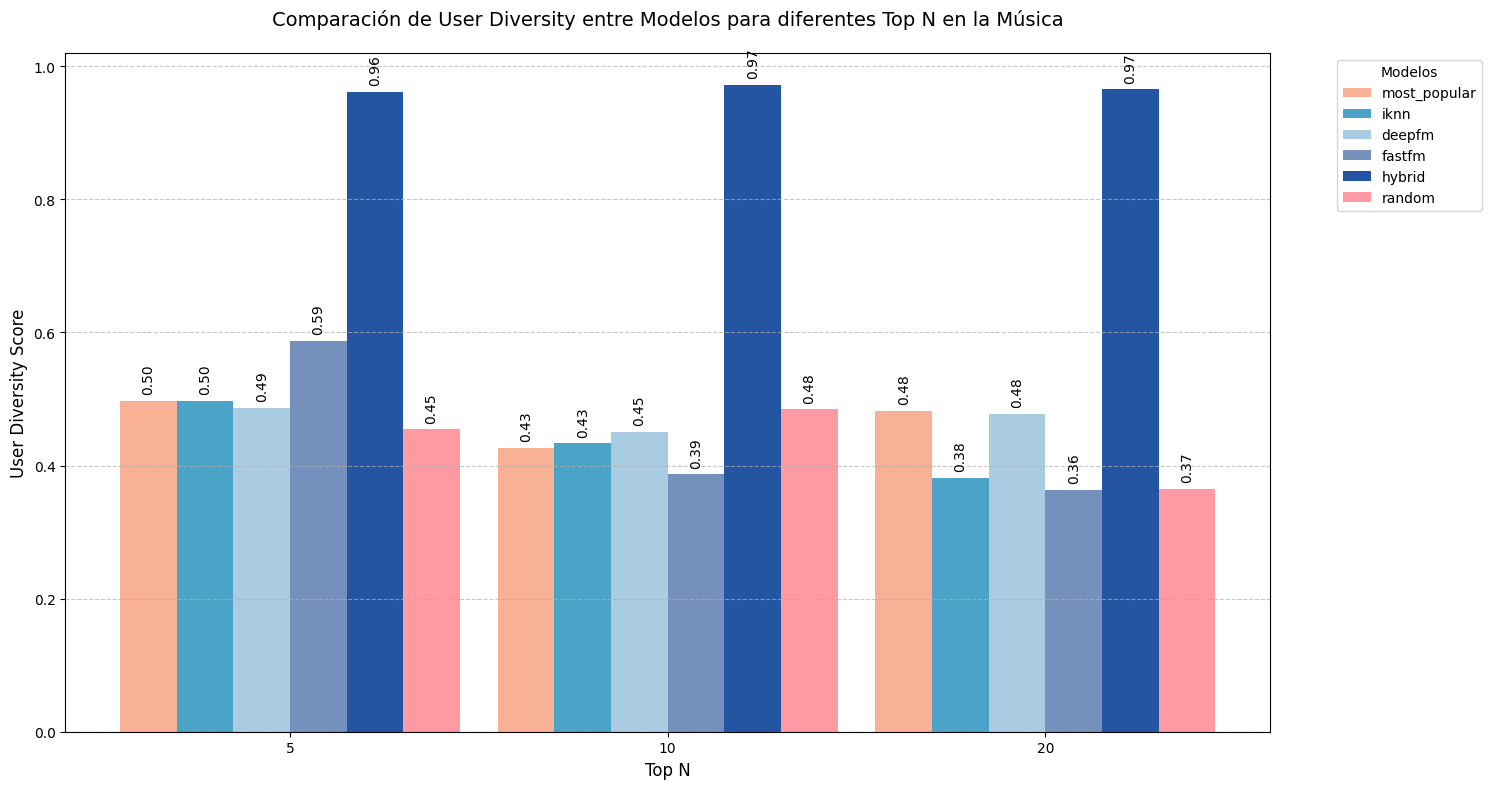

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Definir colores para cada modelo
colors = {
    'hybrid': '#2355a2',       # Azul oscuro
    'iknn': '#4ba3c7',         # Verde azulado
    'deepfm': '#a9cce3',       # Celeste claro
    'fastfm': '#7491bd',       # Azul grisáceo
    'most_popular': '#f8b195', # Naranja pastel
    'random': '#ff9aa2'        # Coral suave
}

# Configurar las posiciones de las barras
bar_width = 0.15
r = np.arange(len(top_n_list))

# Crear barras para cada modelo
for i, model in enumerate(models):
    # Obtener los valores precalculados de diversity_scores
    scores = diversity_scores[model]

    # Posición de las barras para este modelo
    bar_positions = r + bar_width * i

    # Crear las barras
    bars = plt.bar(bar_positions, scores,
                   width=bar_width,
                   color=colors.get(model, '#CCCCCC'),
                   label=model)

    # Añadir valores sobre las barras
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar_width/2., height + 0.01,
                 f'{height:.2f}',
                 ha='center', va='bottom',
                 rotation=90)

# Personalizar el gráfico
plt.title('Comparación de User Diversity entre Modelos para diferentes Top N en la Música', fontsize=14, pad=20)
plt.xlabel('Top N', fontsize=12)
plt.ylabel('User Diversity Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Ajustar las etiquetas del eje x
plt.xticks(r + bar_width * (len(models) - 1) / 2, top_n_list)

# Añadir leyenda
plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los márgenes
plt.tight_layout()

plt.show()

In [51]:
# Inicializar una lista para almacenar resultados de deepfm
results_deepfm = []

# Valores de N para evaluar
top_n_values = [5, 10, 15, 20, 25, 30]

# Recolectar métricas para cada valor de N
for n in top_n_values:
    metric_results_deepfm = deepfm_metrics(
        data_music_test,
        data_music_train,
        n, 5,
        beta_lt=0.4,
        lambda_ips=0.5
    )
    metric_results_deepfm['N'] = n  # Agregar el valor de N
    results_deepfm.append(metric_results_deepfm)

# Convertir los resultados en un DataFrame para facilitar la visualización
results_deepfm_df = pd.DataFrame(results_deepfm)

Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8404
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3900
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4063
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4150
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3680
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
User: franhale - Recommended: ['fergie-glamorous', 'the cure-a letter to elise', "the replacements-anywhere's better than here", "carole king-it's too late", 'pixies-broken face']
Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6830
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4221
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4471
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3395
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
User: eartle - Recommended: ['berlin

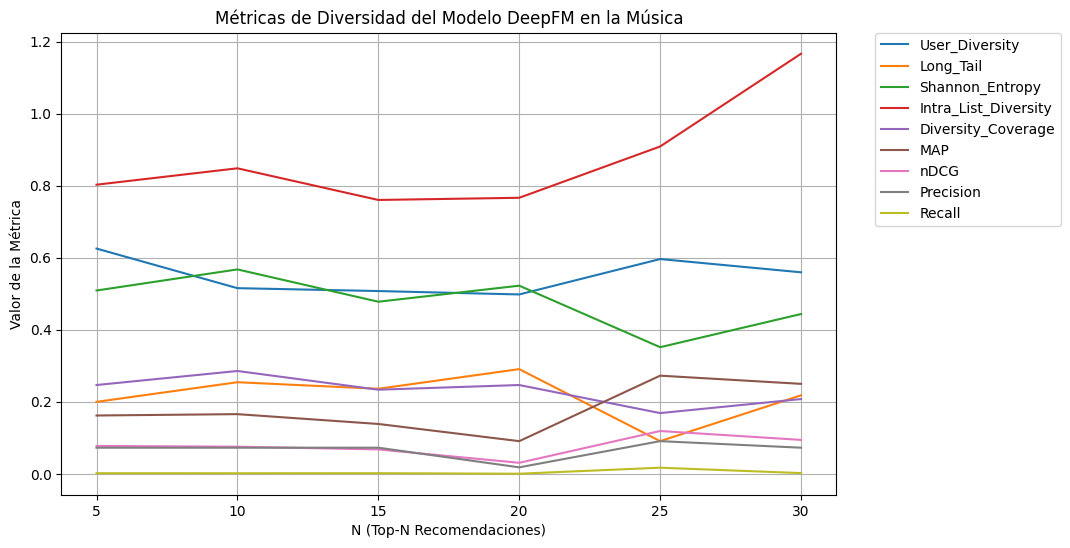

In [52]:
# Métricas de diversidad a graficar para deepfm
metrics_to_plot = [
    "User_Diversity", "Long_Tail", "Shannon_Entropy",
    "Intra_List_Diversity", "Diversity_Coverage", "MAP",
    "nDCG", "Precision", "Recall"
]

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada métrica
for metric in metrics_to_plot:
    plt.plot(results_deepfm_df['N'], results_deepfm_df[metric], label=metric)

# Configurar título, etiquetas y leyenda
plt.title("Métricas de Diversidad del Modelo DeepFM en la Música")
plt.xlabel("N (Top-N Recomendaciones)")
plt.ylabel("Valor de la Métrica")
plt.legend(
    loc="upper left",            # Posición base dentro del gráfico
    bbox_to_anchor=(1.05, 1),    # Ajuste para colocarla fuera, en la esquina superior derecha
    fontsize=10,                 # Tamaño de la fuente
    borderaxespad=0              # Reducir espacio entre la leyenda y el gráfico
)
plt.grid()
plt.show()